# Heart Disease Project - Exploratory Data Analysis

In this notebook, I will perform EDA on the following Heart Disease dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci). My ultimate goal will be to create a Machine Learning model to predict whether or not a patient has heart disease, given a set of information about them.

# Step 1 - Import, load, and inspect
In this first step, I will import the libraries needed for this notebook, load the data about heart disease, and inspect what the data looks like.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('heart.csv')

In [3]:
# take a quick look at the columns in the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This last piece of code shows us the columns and their values for the first few rows, but what do these columns actually represent? Here is the description for each column from the Kaggle dataset description:

* age - age in years
* sex - 1 for male, 0 for female
* cp - chest pain type (4 values) - CATEGORICAL
* trestbps - resting blood pressure
* chol - serum cholestoral
* fbs - fasting blood sugar > 120 - 1 for True, 0 for False
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina - 1 for Yes, 0 for No
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect - CATEGORICAL (NOTE: this is the description given by Kaggle, but the actual dataset contains values ranging from 0 to 3, not the numbers listed here)
* target (our label) - 0 for heart disease, 1 for healthy (NOTE: this is the opposite of how labels usually work)

In [4]:
# get a feel for the size and shape of the data
df.shape # 303 rows (examples), 14 columns

(303, 14)

# Step 2 - Search for and remedy outliers, missing values, and duplicate rows
In this step, I will find and correct flaws in the dataset that could interfere with accurate visualization and modeling.

In [5]:
# describe the data - a good way to find outliers and see the distribution / center of the features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Outliers**:
The previous cell makes it easy to find outliers. I don't see any obvious outliers, but I will inspect one possibility in the cell below. Unfortunately, I have very little domain knowledge here, which hinders my ability to find outliers. For example, I don't know if 564 mg/dl is a reasonable serum cholestoral level or not.

In [6]:
# the maximum for the "chol" cell is abnormally large 
#let's inspect this further to decide if this is an unrealistic outlier

df[df['chol'] > 400] # After looking, this remains unclear for me - I should consult someone with domain knowledge

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [7]:
# find empty cells 
df.isnull().sum() # no empty cells!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Missing values**: There are no missing values in the entire dataset.

In [8]:
df[df.duplicated()] # search for duplicate values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
# lets take a look at both of these columns
df[df['trestbps'] == 138]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


**Duplicate values**: It appears that rows 163 and 164 are exactly the same. I will remedy this by dropping row 164 (in the following code cell).

In [10]:
df = df.drop([164])
df.head(165) # after inspecting the head, we can see that we have successfully dropped row 164

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


# Step 3 - Feature engineering
Feature engineering can help prepare the data for modeling. In this step, I will normalize the data by converting the values of all rows (besides "target") to their z-scores. I chose to normalize the values here in order to facilitate modeling later on. With values ranging from 0-1 in some categories and 126-524 in others, this can skew a model or make the model take longer to converge. Feature regularization will remedy these problems.

In [11]:
normalized_df = (df[['age','sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal']] - df[['age','sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal']].mean()) / df[['age','sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal']].std()

In [12]:
normalized_df.head() # looks great - all of our values are now on a similar scale (roughly between -3 and 3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948220,0.681525,1.973195,0.762800,-0.260852,2.385833,-1.000880,0.018795,-0.697187,1.082226,-2.267418,-0.713727,-2.144396
1,-1.925352,0.681525,1.004244,-0.091249,0.067628,-0.417753,0.900163,1.634266,-0.697187,2.115415,-2.267418,-0.713727,-0.513143
2,-1.483264,-1.462439,0.035293,-0.091249,-0.821201,-0.417753,-1.000880,0.979345,-0.697187,0.307334,0.977891,-0.713727,-0.513143
3,0.174566,0.681525,0.035293,-0.660615,-0.202885,-0.417753,0.900163,1.241314,-0.697187,-0.209261,0.977891,-0.713727,-0.513143
4,0.285088,-1.462439,-0.933658,-0.660615,2.077155,-0.417753,0.900163,0.586393,1.429586,-0.381459,0.977891,-0.713727,-0.513143


In [13]:
# we need to add our target/label column back on to the normalized dataframe
normalized_df['target'] = df['target']

In [14]:
normalized_df.head(165) # I want to look at the first 5 rows, plus rows 160-165, just like I did earlier
# to compare targets and make sure this all worked smoothly

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948220,0.681525,1.973195,0.762800,-0.260852,2.385833,-1.000880,0.018795,-0.697187,1.082226,-2.267418,-0.713727,-2.144396,1
1,-1.925352,0.681525,1.004244,-0.091249,0.067628,-0.417753,0.900163,1.634266,-0.697187,2.115415,-2.267418,-0.713727,-0.513143,1
2,-1.483264,-1.462439,0.035293,-0.091249,-0.821201,-0.417753,-1.000880,0.979345,-0.697187,0.307334,0.977891,-0.713727,-0.513143,1
3,0.174566,0.681525,0.035293,-0.660615,-0.202885,-0.417753,0.900163,1.241314,-0.697187,-0.209261,0.977891,-0.713727,-0.513143,1
4,0.285088,-1.462439,-0.933658,-0.660615,2.077155,-0.417753,0.900163,0.586393,1.429586,-0.381459,0.977891,-0.713727,-0.513143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.174566,0.681525,0.035293,-0.660615,-0.125595,-0.417753,0.900163,0.848361,-0.697187,-0.898054,-2.267418,-0.713727,-0.513143,1
161,0.064044,-1.462439,0.035293,0.022624,1.845286,-0.417753,0.900163,0.717377,-0.697187,0.135136,0.977891,-0.713727,-0.513143,1
162,-1.483264,0.681525,0.035293,-0.660615,-1.729352,-0.417753,0.900163,1.415959,-0.697187,-0.898054,0.977891,-0.713727,-0.513143,1
163,-1.814830,0.681525,1.004244,0.364243,-1.381549,-0.417753,0.900163,1.023007,-0.697187,-0.898054,0.977891,3.259461,-0.513143,1


# Step 4 - Explore the relationship between features and label
It's important to know how the features relate to the label in order to create a meaningful model. In this step, I will explore these relationships with code and visualizations.

In [15]:
# find correlations of features with the target/label
df[df.columns[:-1]].apply(lambda x: x.corr(df['target']))
# the following values have higher correlation with the target: cp, thalach, exang, oldpeak, slope, ca, thal

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
dtype: float64

In [16]:
# Is my label imbalanced? 1 = no heart disease, 0 = heart disease

df.target.value_counts() # My label has slightly more examples without heart disease (aka healthy patients)

1    164
0    138
Name: target, dtype: int64

In [17]:
# How many patients have heart disease, by sex? # Sex 0 = Female, Sex 1 = Male

df.groupby(['sex']).target.value_counts() # The vast majority of our positive heart disease patients are men (114/138)

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

In [18]:
# Set up my plotting styles
sns.set_style('darkgrid')

%matplotlib inline

In [19]:
# Create new column for more clear visualization
df['Label'] = df.target.apply(lambda x: "Heart Disease" if x == 0 else "Healthy")

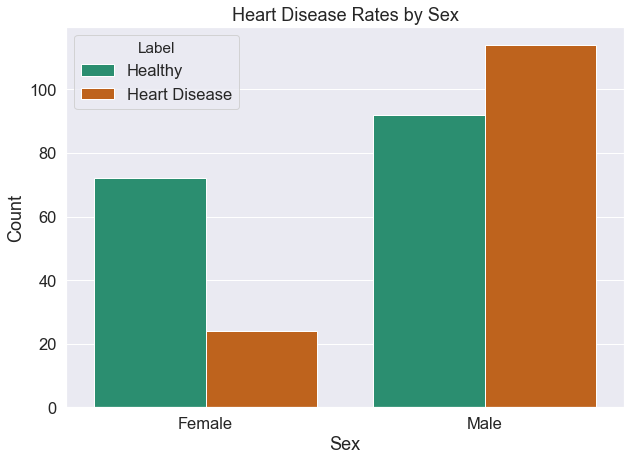

In [20]:
# Heart disease by sex in our dataset

plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Dark2')

by_sex = sns.countplot(data=df, x="sex", hue="Label")

sex_labels = ["Female", "Male"]

by_sex.set(title="Heart Disease Rates by Sex",xticklabels=sex_labels, xlabel="Sex", ylabel="Count")
plt.show()

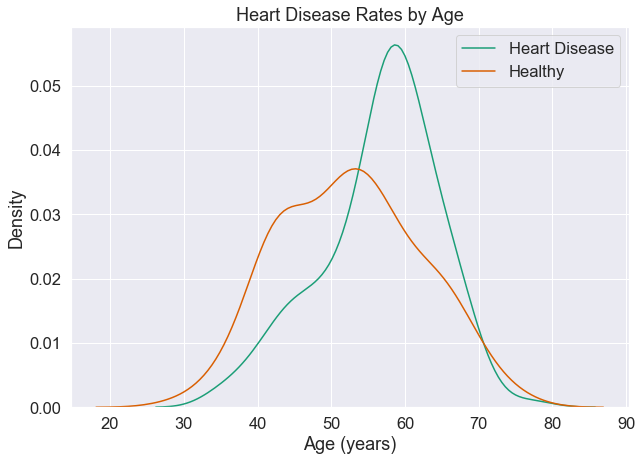

In [21]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_palette('Dark2')

sns.kdeplot(df.loc[df['Label'] == 'Heart Disease', 'age'], label='Heart Disease')
sns.kdeplot(df.loc[df['Label'] == 'Healthy', 'age'], label='Healthy')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Heart Disease Rates by Age')
plt.show()

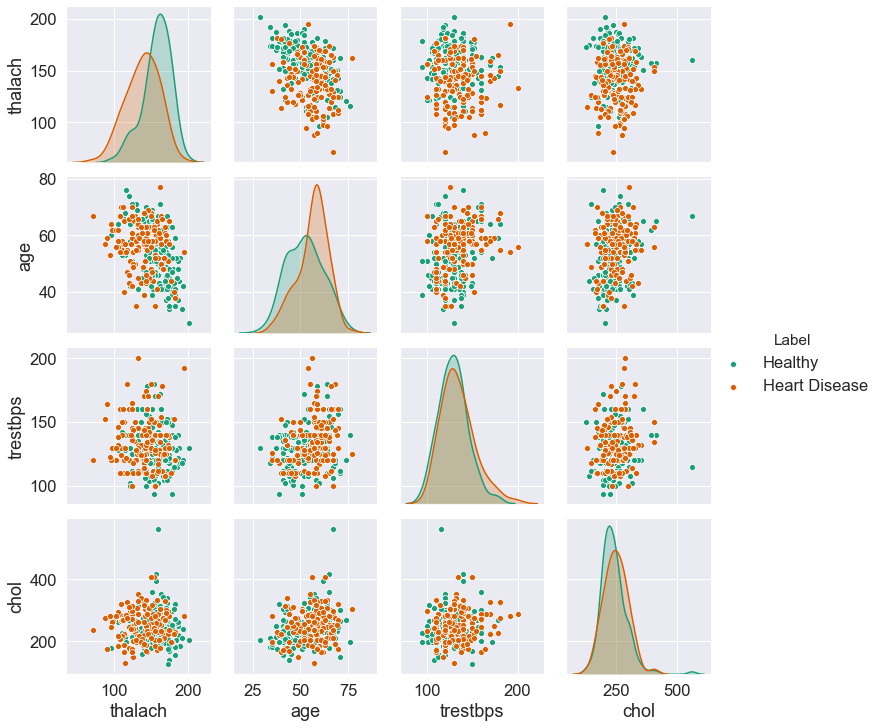

In [22]:
var_pair = sns.pairplot(df, vars=['thalach','age','trestbps','chol'],hue='Label')

# Step 5 - Save clean/normalized DF to CSV
This is the CSV that we will use for our Machine Learning model.

In [23]:
normalized_df.to_csv('heart_clean.csv')